# データフレームからのデータの抽出

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

### DataFrame から特定の列を Series として取り出す例です。

In [2]:
from numpy.random import randint
dices = randint(1,7,(5,2))
diceroll = DataFrame(dices, columns=['dice1','dice2'])
diceroll

,dice1,dice2
0,1,2
1,4,2
2,2,1
3,3,1
4,1,4


配列の index に column 名を指定して取り出します。

In [3]:
diceroll['dice1']

0    1
1    4
2    2
3    3
4    1
Name: dice1, dtype: int64

column 名を属性に指定して取り出します。

In [4]:
diceroll.dice1

0    1
1    4
2    2
3    3
4    1
Name: dice1, dtype: int64

### 複数の列を DataFrame として取り出す例です。

In [5]:
data = {'City': ['Tokyo','Osaka','Nagoya','Okinawa'],
                 'Temperature': [25.0,28.2,27.3,30.9],
                 'Humidity': [44,42,np.nan,62]}
cities = DataFrame(data)
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,NaN,27.3
3,Okinawa,62.0,30.9


In [6]:
cities[['City', 'Humidity']]

,City,Humidity
0,Tokyo,44.0
1,Osaka,42.0
2,Nagoya,NaN
3,Okinawa,62.0


次のように、単一の列を DataFrame として取り出すこともできます。

In [7]:
cities[['City']]

,City
0,Tokyo
1,Osaka
2,Nagoya
3,Okinawa


次は Series として取り出す場合です。

In [8]:
cities['City']

0      Tokyo
1      Osaka
2     Nagoya
3    Okinawa
Name: City, dtype: object

### DataFrame から行を指定して取り出す例です。

配列のスライス記法で取り出す行を指定します。

In [9]:
cities[0:2]

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2


In [10]:
cities[2:3]

,City,Humidity,Temperature
2,Nagoya,NaN,27.3


In [11]:
cities[1:]

,City,Humidity,Temperature
1,Osaka,42.0,28.2
2,Nagoya,NaN,27.3
3,Okinawa,62.0,30.9


特定の条件を満たす行だけを取り出すこともできます。

In [12]:
cities[cities['Temperature']>28]

,City,Humidity,Temperature
1,Osaka,42.0,28.2
3,Okinawa,62.0,30.9


### 行と列の両方を指定して取り出す例です。

In [13]:
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,NaN,27.3
3,Okinawa,62.0,30.9


行はスライス記法、列は column 名のリストで指定します。

In [14]:
cities.ix[1:3, ['City','Humidity']]

,City,Humidity
1,Osaka,42.0
2,Nagoya,NaN
3,Okinawa,62.0


### DataFrame の行ごとに処理をする例です。

In [15]:
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,NaN,27.3
3,Okinawa,62.0,30.9


iterrows メソッドは、各行の index とその行を表わす Series オブジェクトを順に返します。

In [16]:
for index, line in cities.iterrows():
    print 'Index:', index
    print line, '\n'

Index: 0
City           Tokyo
Humidity          44
Temperature       25
Name: 0, dtype: object 

Index: 1
City           Osaka
Humidity          42
Temperature     28.2
Name: 1, dtype: object 

Index: 2
City           Nagoya
Humidity          NaN
Temperature      27.3
Name: 2, dtype: object 

Index: 3
City           Okinawa
Humidity            62
Temperature       30.9
Name: 3, dtype: object 



### データフレームを変更する例です。

DataFrame から抽出したオブジェクトを変更する際は、明示的にコピーを作成します。

In [17]:
humidity = cities['Humidity'].copy()
humidity[2] = 50
humidity

0    44.0
1    42.0
2    50.0
3    62.0
Name: Humidity, dtype: float64

コピーを変更しても元の DataFrame が変更されることはありません。

In [18]:
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,NaN,27.3
3,Okinawa,62.0,30.9


DataFrame の特定要素を変更する際は、loc メソッドで要素を指定します。

In [19]:
cities.loc[2,'Humidity'] = 50
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,50.0,27.3
3,Okinawa,62.0,30.9


30より大きい値の Temperature を30に揃える処理の例です。

In [20]:
for index, line in cities.iterrows():
    if line['Temperature'] > 30:
        cities.loc[index, 'Temperature'] = 30
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,50.0,27.3
3,Okinawa,62.0,30.0


条件による行の指定と組み合わせることもできます。

In [21]:
cities.loc[(cities['Temperature']>27)&(cities['Temperature']<29), 'Temperature'] = 28
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.0
2,Nagoya,50.0,28.0
3,Okinawa,62.0,30.0


### dropna メソッドで欠損値を含む行を削除する例です。

In [22]:
cities.loc[2,'Humidity'] = np.nan
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.0
2,Nagoya,NaN,28.0
3,Okinawa,62.0,30.0


In [23]:
cities = cities.dropna()
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.0
3,Okinawa,62.0,30.0


## 練習問題

(1) 次の関数 create_dataset() を用いて、num=10 個のデータからなるデータフレーム data を作成します。その後、iterrowsメソッドを利用して、データポイント (x,y) のy値と関数 sin(2πx) の平方根平均二乗誤差 √{sum(sin(2πx) - y)\*\*2 / num} を計算してください。

ヒント：この例では、平方根平均二乗誤差は約0.3になります。

In [24]:
from numpy.random import normal

def create_dataset(num):
    data_x = np.linspace(0,1,num)
    data_y = np.sin(2*np.pi*data_x) + normal(loc=0, scale=0.3, size=num)
    return DataFrame({'x': data_x, 'y': data_y})

(2) (1)のDataFrameから列 'x' だけを取り出したSeriesオブジェクトを変数 x に格納してください。nameプロパティは、'x' とします。

さらに、x\*\*2 （各要素を2乗した値）を要素とするSeriesオブジェクトを作成して、変数 x2 に格納してください。nameプロパティは、'x2' とします。

同様に、x\*\*3、x\*\*4 を要素とするSeriesオブジェクトを変数 x3, x4 に格納します。

(3) (2)で作成した x, x2, x3, x4 を結合して、x, x2, x3, x4を列に持ったDataFrame dataset を作成してください。

ヒント：結果は、次のような DataFrame になります。

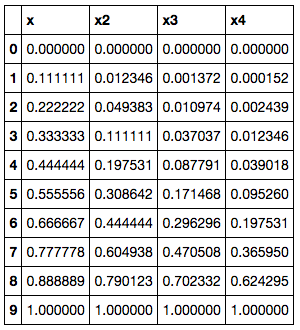

In [25]:
from PIL import Image
Image.open("figure01.png") 